# `YourCabs.com`

# Overall Analysis and Implementation Plan
- `ID` - Set as Row Index - All values unique
- `User_ID` - Drop - PII - mobile number - we do not use Personal Information Identifiers in machine learning features
- `vehicle_model_id` - Drop, since >70% of values are 12

- Divide the data into 3 datasets based on travel_type_id, since for different travel types different features are applicable

- After dividing the data into 3 subsets, 3 different machine learning models are to be created:
1. ML Model 1 for travel_type_1
2. ML Model 2 for travel type_2
3. ML Model 3 for travel_type_3

# Below is the column-wise analysis for each subset regarding if they need to be dropped, kept or transformed.

## For travel_type_id = 1

- package_id - drop - all null values
- travel_type_id - drop - all same values
- from_area_id - transform and drop into cancellation volume i.e. Zero, High, Medium or Low cancellation area
- to_area_id - drop - all values null
- from_city_id - use mode to impute the null values
- to_city_id - use mode to impute the null values
- Make a column for inter-city routes - from_city_id -> to_city_id
- city_routes - transform into cancellation volume i.e. Zero, High, Medium or Low cancellation routes
- to_city_id, from_city_id, routes, cancellation_perc - drop
- from_date - transform into - dayOfWeek, Month, Weekday/weekend, TimeofDay(Hour | Morning Afternoon Evening Night)
- time_diff - calculate the number of hours b/w booking and actual start time in hours
- booking_nature - transform the time_diff into Urgent, SameDay, Regular, Advance bookings, since time_diff has >10% outliers
- online_booking | mobile_site_booking - keep
- from_date - drop
- booking_created - drop
- drop all 4 lat/long(from_lat,from_long,to_lat,to_long) as to_lat and to_long has all NULL values and from_lat,from_long's information is already captured in from_area_id


## For travel_type_id = 2

- package_id - drop - all null values
- travel_type_id - drop - all same values
- from_area_id,to_area_id - Make a column for intra-city routes - from_area_id -> to_area_id - transform into cancellation volume i.e. Zero, High, Medium or Low cancellation routes
- from_city_id - drop - all values null
- to_city_id - drop - all values null
- from_date - transform into - dayOfWeek, Month, Weekday/weekend, TimeofDay(Hour | Morning Afternoon Evening Night)
- time_diff - calculate the number of hours b/w booking and actual start time in hours
- booking_nature - transform the time_diff into Urgent, SameDay, Regular, Advance bookings, since time_diff has >10% outliers
- online_booking | mobile_site_booking - keep
- from_date - drop
- booking_created - drop
- from_lat,from_long,to_lat,to_long - impute missing using median
- from these lat/long - calculate the distance in KM (geopy) and then drop all four lat/long col


## For travel_type_id = 3

- package_id - keep
- travel_type_id - drop - all same values
- from_area_id - transform and drop into cancellation volume i.e. Zero, High, Medium or Low cancellation area
- to_area_id - drop - all values null
- from_city_id - drop - all values null
- to_city_id - drop - all values null
- from_date - transform into - dayOfWeek, Month, Weekday/weekend, TimeofDay(Hour | Morning Afternoon Evening Night)
- time_diff - calculate the number of hours b/w booking and actual start time in hours
- booking_nature - transform the time_diff into Urgent, SameDay, Regular, Advance bookings, since time_diff has >10% outliers
- online_booking | mobile_site_booking - keep
- from_date - drop
- booking_created - drop
- drop all 4 lat/long(from_lat,from_long,to_lat,to_long) as to_lat and to_long has all NULL values and from_lat,from_long's information is already captured in from_area_id


## Preprocess these subsets if required such as label encoding etc.


## Machine Learning - Classification
- Decision Tree
- Random Forest
- Naive Bayes Classifier

## Compare the performance and then select the BEST model for each of the three datasets


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# !git clone https://github.com/sudhirjangra/your_cab_data_analysis.git

fatal: destination path 'your_cab_data_analysis' already exists and is not an empty directory.


In [3]:
# df = pd.read_csv('/content/your_cab_data_analysis/YourCabs.csv')
df = pd.read_csv('YourCabs.csv')

In [286]:
df.sample(5)

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
21675,159199,35899,12,2,NaN,112.0,1084.0,NaN,NaN,07-07-2013 18:15,0,1,07-07-2013 16:44,12.933310,77.56666,12.892657,77.581866,1
6982,141063,26554,28,2,NaN,585.0,83.0,NaN,NaN,3/15/2013 22:45,1,0,3/14/2013 8:09,12.976770,77.57270,12.924150,77.672290,0
35464,176132,43784,24,3,3.0,496.0,NaN,NaN,NaN,9/29/2013 9:30,0,0,9/29/2013 0:04,13.058450,77.64075,NaN,NaN,0
12899,148295,30399,12,1,NaN,1056.0,NaN,1.0,32.0,05-10-2013 07:00,1,0,05-10-2013 01:26,12.919199,77.60931,NaN,NaN,0
36368,177248,42455,12,2,NaN,339.0,393.0,15.0,NaN,10-05-2013 12:15,0,0,10-04-2013 20:20,12.910280,77.64512,13.199560,77.706880,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   travel_type_id       43431 non-null  int64  
 4   package_id           7550 non-null   float64
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

## Set id as Index

In [5]:
df.set_index('id', inplace=True)

In [6]:
df.sample(5)

,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
id,,,,,,,,,,,,,,,,,
172806,42304,24,2,NaN,1243.0,393.0,15.0,NaN,09-11-2013 14:30,0,0,09-11-2013 09:23,12.98275,77.61582,13.19956,77.70688,0
158644,35743,65,1,NaN,85.0,NaN,15.0,29.0,07-06-2013 06:45,0,0,07-05-2013 22:44,12.95755,77.71803,NaN,NaN,0
160418,36475,65,2,NaN,83.0,585.0,NaN,NaN,7/13/2013 19:15,0,0,7/13/2013 16:32,12.92415,77.67229,12.97677,77.57270,0
152396,17664,12,2,NaN,221.0,767.0,NaN,NaN,06-01-2013 20:30,0,0,06-01-2013 13:17,12.98541,77.57891,12.91220,77.51043,0
152155,19409,12,2,NaN,571.0,136.0,NaN,NaN,5/31/2013 19:30,1,0,5/31/2013 15:24,12.95185,77.69642,12.90796,77.62418,1


## Dropping Duplicates

In [7]:
df.duplicated().sum()

np.int64(41)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
print(df.duplicated().sum())

0


In [10]:
# pd.set_option('display.max_rows()',None)
df['vehicle_model_id'].value_counts()

,count
vehicle_model_id,
12,31822
85,2407
89,2391
65,1911
28,1701
24,1494
87,563
90,312
23,297


## Dropping user_id and vehicle_model_id

In [11]:
df.drop(columns=['user_id', 'vehicle_model_id'], axis=1, inplace=True)

In [12]:
df.sample(2)

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
id,,,,,,,,,,,,,,,
164885,2,NaN,571.0,393.0,15.0,NaN,08-05-2013 07:45,0,0,08-05-2013 00:07,12.95185,77.69642,13.19956,77.70688,0
145627,3,1.0,136.0,NaN,NaN,NaN,4/22/2013 8:30,0,0,4/21/2013 20:35,12.90796,77.62418,NaN,NaN,0


## Checking datatypes

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43390 entries, 132512 to 185941
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       43390 non-null  int64  
 1   package_id           7541 non-null   float64
 2   from_area_id         43302 non-null  float64
 3   to_area_id           34261 non-null  float64
 4   from_city_id         16325 non-null  float64
 5   to_city_id           1588 non-null   float64
 6   from_date            43390 non-null  object 
 7   online_booking       43390 non-null  int64  
 8   mobile_site_booking  43390 non-null  int64  
 9   booking_created      43390 non-null  object 
 10  from_lat             43297 non-null  float64
 11  from_long            43297 non-null  float64
 12  to_lat               34261 non-null  float64
 13  to_long              34261 non-null  float64
 14  Car_Cancellation     43390 non-null  int64  
dtypes: float64(9), int64(4), object(2)


In [14]:
# df['package_id'] = df['package_id'].astype('int')

# df['from_area_id'] = df['from_area_id'].astype('object')
# df['to_area_id'] = df['to_area_id'].astype('object')
# df['from_city_id'] = df['from_city_id'].astype('object')
# df['to_city_id'] = df['to_city_id'].astype('object')

# df['from_date'] = pd.to_datetime(df['from_date'],formate='mixed')
# df['booking_created'] = pd.to_datetime(df['booking_created'],formate='mixed')

In [15]:
df['travel_type_id'].value_counts()

,count
travel_type_id,
2,34260
3,7541
1,1589


## Dividing the datasets into 3 based on travel_type_id

In [16]:
tt1 = df.loc[df.travel_type_id==1]
tt2 = df.loc[df.travel_type_id==2]
tt3 = df.loc[df.travel_type_id==3]

In [17]:
tt1.sample(3)

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
id,,,,,,,,,,,,,,,
149419,1,NaN,393.0,NaN,15.0,32.0,5/15/2013 21:45,0,0,5/15/2013 20:06,13.19956,77.706880,NaN,NaN,0
183109,1,NaN,585.0,NaN,15.0,55.0,11-06-2013 06:00,0,0,11-04-2013 18:46,12.97677,77.572700,NaN,NaN,0
178479,1,NaN,1089.0,NaN,15.0,131.0,10/18/2013 6:00,1,0,10-11-2013 13:21,12.99517,77.731147,NaN,NaN,0


In [18]:
tt2.sample(3)

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
id,,,,,,,,,,,,,,,
165913,2,NaN,515.0,393.0,15.0,NaN,08-10-2013 07:30,1,0,08-09-2013 22:14,12.978960,77.67345,13.19956,77.70688,0
162521,2,NaN,466.0,1160.0,NaN,NaN,7/25/2013 10:00,1,0,7/25/2013 8:56,13.017436,77.64458,12.93884,77.69755,0
138025,2,NaN,269.0,391.0,NaN,NaN,2/17/2013 7:00,0,0,2/15/2013 21:46,12.974400,77.69183,12.98099,77.60209,1


In [19]:
tt3.sample(3)

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
id,,,,,,,,,,,,,,,
184308,3,1.0,393.0,NaN,15.0,NaN,11/14/2013 20:45,1,0,11-12-2013 21:08,13.199560,77.706880,NaN,NaN,0
160612,3,1.0,1323.0,NaN,NaN,NaN,7/15/2013 8:00,0,0,7/14/2013 19:10,12.869805,77.653211,NaN,NaN,0
172461,3,1.0,58.0,NaN,NaN,NaN,09-09-2013 11:30,1,0,09-09-2013 09:26,12.889630,77.601190,NaN,NaN,0


# Preprocessing `tt1`

In [20]:
tt1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 132519 to 185916
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       1589 non-null   int64  
 1   package_id           0 non-null      float64
 2   from_area_id         1501 non-null   float64
 3   to_area_id           1 non-null      float64
 4   from_city_id         1393 non-null   float64
 5   to_city_id           1588 non-null   float64
 6   from_date            1589 non-null   object 
 7   online_booking       1589 non-null   int64  
 8   mobile_site_booking  1589 non-null   int64  
 9   booking_created      1589 non-null   object 
 10  from_lat             1496 non-null   float64
 11  from_long            1496 non-null   float64
 12  to_lat               1 non-null      float64
 13  to_long              1 non-null      float64
 14  Car_Cancellation     1589 non-null   int64  
dtypes: float64(9), int64(4), object(2)
m

In [21]:
tt1.drop(columns=[ 'package_id', 'travel_type_id', 'to_area_id','from_lat','from_long', 'to_lat', 'to_long'], axis=1, inplace=True)

In [22]:
tt1.sample(3)

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation
id,,,,,,,,
142974,293.0,15.0,146.0,04-06-2013 08:00,0,0,3/31/2013 17:57,0
173334,832.0,15.0,113.0,9/14/2013 8:30,0,0,9/13/2013 23:33,0
159335,776.0,15.0,45.0,07-08-2013 22:00,0,0,07-08-2013 13:15,0


In [23]:
tt1['from_area_id'] = tt1['from_area_id'].astype('object')
tt1['from_city_id'] = tt1['from_city_id'].astype('object')
tt1['to_city_id'] = tt1['to_city_id'].astype('object')

In [24]:
tt1['from_date'] = pd.to_datetime(tt1['from_date'],format='mixed')
tt1['booking_created'] = pd.to_datetime(tt1['booking_created'],format='mixed')

In [25]:
tt1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 132519 to 185916
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   from_area_id         1501 non-null   object        
 1   from_city_id         1393 non-null   object        
 2   to_city_id           1588 non-null   object        
 3   from_date            1589 non-null   datetime64[ns]
 4   online_booking       1589 non-null   int64         
 5   mobile_site_booking  1589 non-null   int64         
 6   booking_created      1589 non-null   datetime64[ns]
 7   Car_Cancellation     1589 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 111.7+ KB


## Missing Value Treatment

In [26]:
print((tt1.isnull().sum() / len(tt1) * 100).round(2))

from_area_id            5.54
from_city_id           12.33
to_city_id              0.06
from_date               0.00
online_booking          0.00
mobile_site_booking     0.00
booking_created         0.00
Car_Cancellation        0.00
dtype: float64


In [27]:
tt1.describe(include=object)

,from_area_id,from_city_id,to_city_id
count,1501.0,1393.0,1588.0
unique,297.0,3.0,116.0
top,393.0,15.0,32.0
freq,257.0,1281.0,475.0


In [28]:
tt1.from_area_id.fillna(tt1['from_area_id'].mode()[0], inplace=True)
tt1.from_city_id.fillna(tt1.from_city_id.mode()[0], inplace=True)
tt1.to_city_id.fillna(tt1.to_city_id.mode()[0], inplace=True)
# tt1.from_area_id.fillna('393.0',inplace=True)
# tt1.from_city_id.fillna('15.0',inplace=True)
# tt1.to_city_id.fillna('32.0',inplace=True)

In [29]:
tt1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 132519 to 185916
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   from_area_id         1589 non-null   float64       
 1   from_city_id         1589 non-null   float64       
 2   to_city_id           1589 non-null   float64       
 3   from_date            1589 non-null   datetime64[ns]
 4   online_booking       1589 non-null   int64         
 5   mobile_site_booking  1589 non-null   int64         
 6   booking_created      1589 non-null   datetime64[ns]
 7   Car_Cancellation     1589 non-null   int64         
dtypes: datetime64[ns](2), float64(3), int64(3)
memory usage: 111.7 KB


## Checking duplicates

In [30]:
print(tt1.duplicated().sum())

0


## Transform & drop `from_area_id`

In [31]:
from_area_id_cancel_perc = tt1[['from_area_id', 'Car_Cancellation']].groupby('from_area_id').mean()['Car_Cancellation']
tt1['from_area_cancel_perc'] = tt1.from_area_id.map(from_area_id_cancel_perc)
tt1.head(5)

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_perc
id,,,,,,,,,
132519,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,0.020408
132531,1383.0,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0.000000
132539,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0.000000
132697,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0.000000
132760,1118.0,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0.000000


In [32]:
tt1.loc[tt1.from_area_cancel_perc>0, 'from_area_cancel_perc']

,from_area_cancel_perc
id,
132519,0.020408
132907,0.008696
132911,0.076923
133098,0.008696
133312,0.166667
...,...
185701,0.020408
185732,0.008696
185738,0.020408


In [33]:
tt1.loc[tt1.from_area_cancel_perc>0, 'from_area_cancel_perc'].describe()

,from_area_cancel_perc
count,610.000000
mean,0.034426
std,0.066119
min,0.008696
25%,0.008696
50%,0.008696
75%,0.021277
max,0.500000


In [34]:
tt1.loc[tt1.from_area_cancel_perc>0, 'from_area_cancel_perc'].quantile(0.33)

np.float64(0.008695652173913044)

In [35]:
print(tt1.loc[tt1.from_area_cancel_perc>0, 'from_area_cancel_perc'].quantile(0.66))

0.02040816326530612


In [36]:
tt1['from_area_cancel_vol'] = np.where(tt1.from_area_cancel_perc > 0.0204081, "High",
                                      np.where(tt1.from_area_cancel_perc == 0, "Zero",
                                      np.where(tt1.from_area_cancel_perc < 0.008695, "Low","Medium")))

In [37]:
tt1.sample(5)

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_perc,from_area_cancel_vol
id,,,,,,,,,,
184288,392.0,15.0,31.0,2013-11-15 04:00:00,1,0,2013-11-12 19:12:00,0,0.0,Zero
166278,182.0,15.0,32.0,2013-08-12 10:00:00,1,0,2013-08-11 18:29:00,0,0.0,Zero
155673,1097.0,15.0,32.0,2013-06-19 06:00:00,0,0,2013-06-18 16:28:00,0,0.0,Zero
184432,977.0,15.0,32.0,2013-11-15 08:00:00,0,0,2013-11-13 17:22:00,0,0.0,Zero
162250,363.0,15.0,32.0,2013-07-25 06:00:00,1,0,2013-07-23 14:41:00,0,0.0,Zero


In [38]:
tt1.from_area_cancel_vol.value_counts()

,count
from_area_cancel_vol,
Zero,979
Medium,345
High,265


In [39]:
# Now we can drop from_area_id and from_area_cancel_perc
tt1.drop(['from_area_id', 'from_area_cancel_perc'], axis=1, inplace=True)

In [40]:
tt1.sample(4)

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol
id,,,,,,,,
185217,15.0,41.0,2013-11-19 14:15:00,0,0,2013-11-19 13:16:00,0,Zero
167861,15.0,29.0,2013-08-24 01:00:00,1,0,2013-08-18 19:14:00,0,High
134374,15.0,131.0,2013-01-19 02:00:00,0,0,2013-01-18 18:14:00,0,Zero
174864,15.0,108.0,2013-09-22 06:00:00,1,0,2013-09-21 21:55:00,0,Zero


## Transfrom & drop `from_city_id` and `to_city_id`

In [41]:
tt1['city_route'] = tt1.from_city_id.astype('str')+ '->'+ tt1.to_city_id.astype('str')

In [42]:
tt1.sample(3)

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route
id,,,,,,,,,
176000,15.0,131.0,2013-09-28 03:30:00,0,0,2013-09-28 02:48:00,0,Zero,15.0->131.0
184955,15.0,32.0,2013-11-17 07:30:00,0,0,2013-11-17 08:34:00,0,Zero,15.0->32.0
158636,15.0,32.0,2013-07-06 06:15:00,0,0,2013-07-05 21:33:00,0,Zero,15.0->32.0


In [43]:
city_route_cancel_perc = tt1[['city_route', 'Car_Cancellation']].groupby('city_route').mean()['Car_Cancellation']
tt1['city_route_cancel_perc'] = tt1.city_route.map(city_route_cancel_perc)
tt1.sample(3)

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route,city_route_cancel_perc
id,,,,,,,,,,
156060,15.0,131.0,2013-06-22 06:00:00,1,0,2013-06-21 10:28:00,0,High,15.0->131.0,0.086957
139348,15.0,55.0,2013-02-27 06:00:00,0,0,2013-02-26 15:22:00,0,Zero,15.0->55.0,0.000000
158242,15.0,30.0,2013-07-04 09:00:00,0,0,2013-07-03 20:50:00,0,High,15.0->30.0,0.000000


In [44]:
print(tt1.loc[tt1.city_route_cancel_perc>0, 'city_route_cancel_perc'].quantile(0.33))

0.017937219730941704


In [45]:
print(tt1.loc[tt1.city_route_cancel_perc>0, 'city_route_cancel_perc'].quantile(0.66))

0.017937219730941704


In [46]:
tt1.loc[tt1.city_route_cancel_perc>0, 'city_route_cancel_perc'].describe()

,city_route_cancel_perc
count,793.000000
mean,0.026482
std,0.019527
min,0.012048
25%,0.017937
50%,0.017937
75%,0.037037
max,0.086957


In [47]:
tt1['city_route_cancel_vol'] = np.where(tt1.city_route_cancel_perc > 0.018, "High",
                                      np.where(tt1.city_route_cancel_perc == 0, "Zero",
                                      np.where(tt1.city_route_cancel_perc < 0.017, "Low","Medium")))

In [48]:
tt1.sample(3)

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route,city_route_cancel_perc,city_route_cancel_vol
id,,,,,,,,,,,
182685,15.0,32.0,2013-11-01 11:00:00,0,0,2013-11-01 10:25:00,0,Zero,15.0->32.0,0.017937,Medium
168924,15.0,32.0,2013-08-24 10:00:00,0,0,2013-08-23 23:13:00,0,Zero,15.0->32.0,0.017937,Medium
159753,1.0,94.0,2013-07-29 21:00:00,1,0,2013-07-10 16:59:00,0,Medium,1.0->94.0,0.000000,Zero


In [49]:
tt1.drop(['from_city_id', 'to_city_id', 'city_route', 'city_route_cancel_perc'],axis=1, inplace=True)

In [50]:
tt1.sample(5)

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol
id,,,,,,,
185732,2013-11-25 09:15:00,0,0,2013-11-22 20:25:00,0,Medium,Zero
142693,2013-03-30 10:30:00,0,0,2013-03-29 22:57:00,0,Zero,Medium
178297,2013-10-11 09:30:00,0,0,2013-10-10 17:58:00,0,Zero,Zero
155602,2013-06-18 09:30:00,0,0,2013-06-18 07:57:00,0,Zero,High
157553,2013-06-30 06:00:00,0,0,2013-06-29 18:17:00,0,Zero,Medium


## Data Preprocessing

In [51]:
tt1['month'] = tt1.from_date.dt.month
tt1['day'] = tt1.from_date.dt.dayofweek #Monday is 0 | Sunday is 6
tt1['hour'] = tt1.from_date.dt.hour
tt1.sample(4)
# tt1.month = tt1.month.map({0:'January', 1:'February',2:'March', 3:'April', 4:'May', 5:'June', 6:'July', 7:'August', 8:'September', 9:'October', 10:'Novermber', 11:'December'})

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol,month,day,hour
id,,,,,,,,,,
172257,2013-09-08 14:00:00,1,0,2013-09-07 21:03:00,0,Medium,High,9,6,14
145325,2013-04-20 08:00:00,0,0,2013-04-19 19:34:00,0,Zero,Medium,4,5,8
167043,2013-08-16 01:00:00,0,0,2013-08-15 02:34:00,0,High,High,8,4,1
132781,2013-01-05 06:00:00,1,0,2013-01-04 12:51:00,0,Zero,Zero,1,5,6


In [52]:
tt1['is_weekend'] = (tt1.day >= 5).astype('int')
tt1.day = tt1.day.map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thrusday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
tt1.head(3)

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend
id,,,,,,,,,,,
132519,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,High,Low,1,Tuesday,9,0
132531,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,Zero,Medium,1,Saturday,8,1
132539,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,Zero,Medium,1,Saturday,8,1


In [53]:
tt1['time_of_day'] = pd.cut(tt1.hour, bins=[-1,6,12,18,24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])
tt1.sample(3)

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day
id,,,,,,,,,,,,
137064,2013-02-09 06:30:00,0,0,2013-02-08 13:54:00,0,Zero,Medium,2,Saturday,6,1,Night
177835,2013-10-10 07:45:00,1,0,2013-10-08 14:35:00,0,Medium,Zero,10,Thrusday,7,0,Morning
184955,2013-11-17 07:30:00,0,0,2013-11-17 08:34:00,0,Zero,Medium,11,Sunday,7,1,Morning


In [54]:
tt1['time_diff'] = (tt1.from_date - tt1.booking_created).dt.total_seconds()/3600
tt1.head(3)

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff
id,,,,,,,,,,,,,
132519,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,High,Low,1,Tuesday,9,0,Morning,0.400000
132531,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,Zero,Medium,1,Saturday,8,1,Morning,259.716667
132539,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,Zero,Medium,1,Saturday,8,1,Morning,89.833333


In [55]:
tt1.drop(['from_date', 'booking_created'], axis=1, inplace=True)
tt1.sample(3)

,online_booking,mobile_site_booking,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff
id,,,,,,,,,,,
146725,1,0,0,Zero,Zero,4,Tuesday,10,0,Morning,16.016667
173400,0,0,0,High,Zero,9,Sunday,7,1,Morning,19.583333
172182,1,0,0,Zero,High,9,Sunday,6,1,Night,183.466667


In [56]:
tt1 = tt1[['from_area_cancel_vol','city_route_cancel_vol','month','day','hour','is_weekend','time_of_day','time_diff','online_booking','mobile_site_booking', 'Car_Cancellation']]
tt1.sample(5)

,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff,online_booking,mobile_site_booking,Car_Cancellation
id,,,,,,,,,,,
151099,Zero,Zero,6,Sunday,7,1,Morning,354.916667,1,0,0
179223,Zero,High,10,Wednesday,12,0,Morning,24.633333,1,0,0
145781,Zero,Medium,4,Tuesday,9,0,Morning,1.200000,0,0,0
177155,High,Medium,10,Sunday,9,1,Morning,214.233333,1,0,1
176720,Medium,Medium,10,Wednesday,15,0,Afternoon,20.183333,0,0,0


In [57]:
tt1.loc[tt1['Car_Cancellation']==1].head(2)

,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff,online_booking,mobile_site_booking,Car_Cancellation
id,,,,,,,,,,,
144904,Medium,High,5,Sunday,8,1,Morning,617.650000,1,0,1
150507,High,High,5,Friday,4,0,Night,41.066667,1,0,1


## Outlier Analysis

<Axes: >

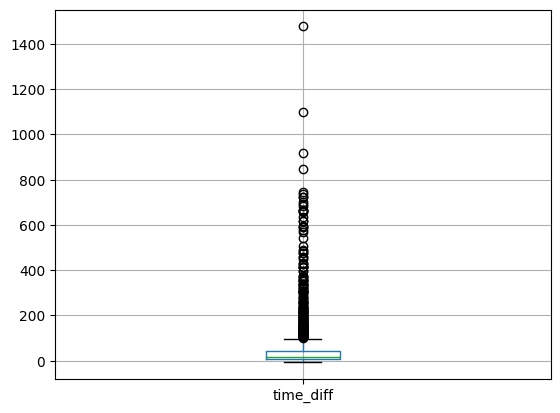

In [58]:
tt1.boxplot('time_diff')

In [59]:
q1 = tt1.time_diff.quantile(0.25)
q3 = tt1.time_diff.quantile(0.75)
iqr = q3-q1
UL = q3 + 1.5*iqr
LL = q1 - 1.5*iqr
ul_count = tt1[tt1['time_diff']>UL].shape[0]
ll_count = tt1[tt1['time_diff']<LL].shape[0]
total_count = ul_count+ll_count
total_perc = total_count*100/tt1.shape[0]
print(f'Q1: {q1} | Q3: {q3} | IQR: {iqr} | UL Count: {ul_count} | LL Count: {ll_count} | Total Outliers: {total_count} | % Outliers: {round(total_perc)}%')


Q1: 9.05 | Q3: 44.55 | IQR: 35.5 | UL Count: 219 | LL Count: 0 | Total Outliers: 219 | % Outliers: 14%


In [60]:
tt1.time_diff.describe()

,time_diff
count,1589.000000
mean,55.630407
std,114.717939
min,-7.700000
25%,9.050000
50%,16.950000
75%,44.550000
max,1477.183333


In [61]:
tt1['time_diff'] =  pd.cut(tt1.time_diff, bins=[-8,2,18,48,1500], labels=['Urgent', 'SameDay', 'Regular', 'Advance'])

In [62]:
tt1.sample(5)

,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff,online_booking,mobile_site_booking,Car_Cancellation
id,,,,,,,,,,,
180484,Zero,Medium,10,Wednesday,11,0,Morning,SameDay,0,0,0
138883,High,Zero,2,Saturday,4,1,Night,SameDay,0,0,0
179234,Zero,Zero,10,Wednesday,4,0,Night,SameDay,0,0,0
181189,Zero,Zero,10,Monday,6,0,Night,Regular,0,0,0
169813,Medium,Zero,8,Thrusday,15,0,Afternoon,SameDay,1,0,0


# EDA

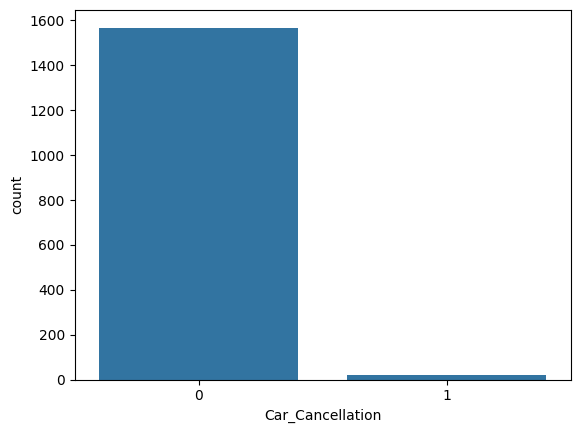

In [63]:
sns.countplot(x='Car_Cancellation', data=tt1)
plt.show()
# Analysis: almost 1% of Long distance travel is cancelled, May not be a huge differenced to buisness
# and not useful for machine learning

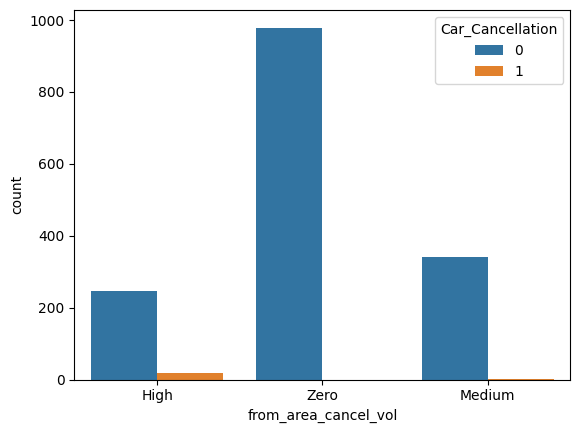

In [64]:
sns.countplot(x='from_area_cancel_vol',hue='Car_Cancellation', data=tt1)
plt.show()

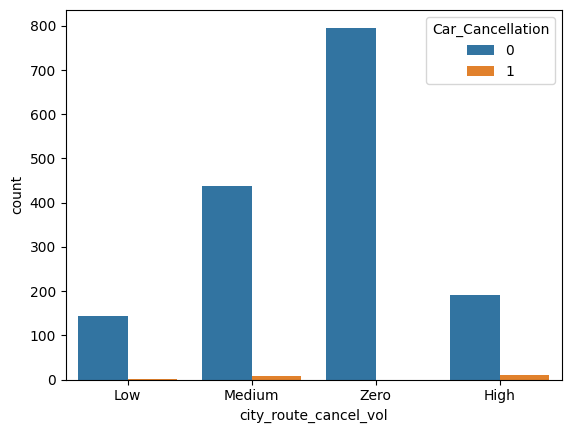

In [65]:
sns.countplot(x='city_route_cancel_vol',hue='Car_Cancellation', data=tt1)
plt.show()

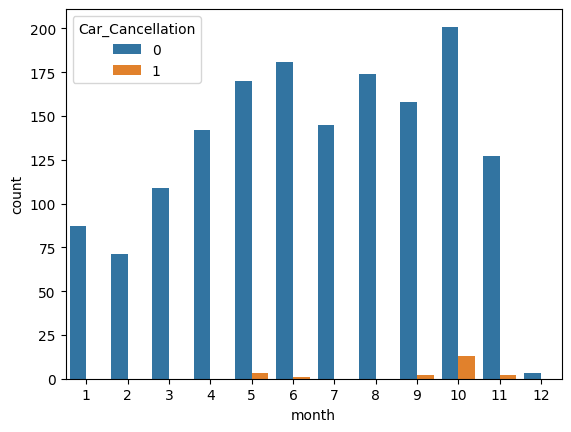

In [66]:
sns.countplot(x='month',hue='Car_Cancellation', data=tt1)
plt.show()

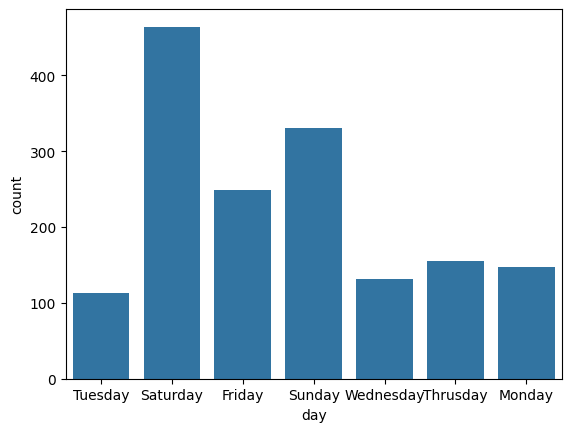

In [67]:
sns.countplot(x='day', data=tt1)
plt.show()

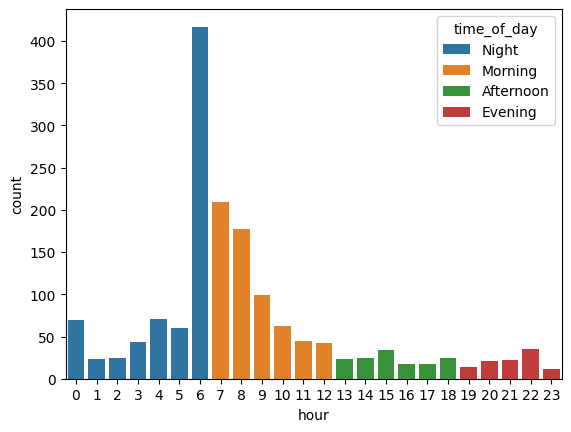

In [68]:
sns.countplot(x='hour',hue='time_of_day',data=tt1)
plt.show()

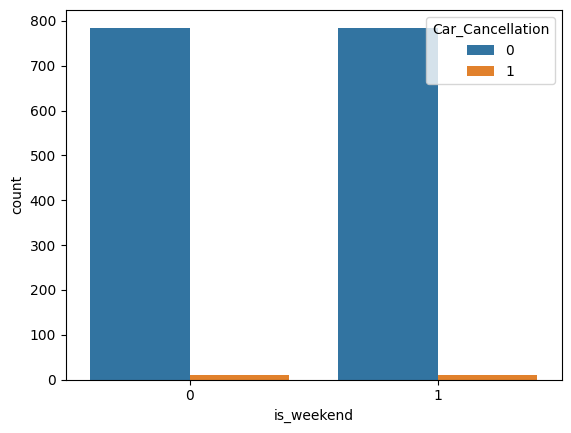

In [69]:
sns.countplot(x='is_weekend',hue='Car_Cancellation', data=tt1)
plt.show()

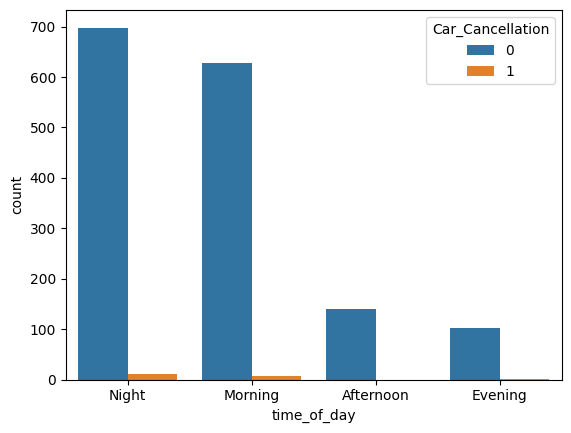

In [70]:
sns.countplot(x='time_of_day',hue='Car_Cancellation', data=tt1)
plt.show()

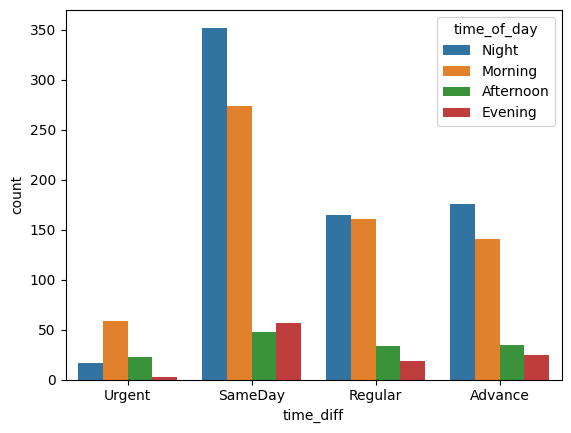

In [71]:
sns.countplot(x='time_diff',hue='time_of_day', data=tt1)
plt.show()

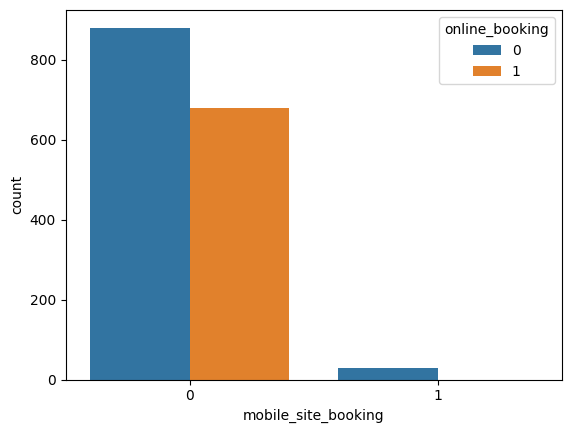

In [72]:
sns.countplot(x='mobile_site_booking',hue='online_booking', data=tt1)
plt.show()

# Label Encoding

In [73]:
tt1.sample(3)

,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff,online_booking,mobile_site_booking,Car_Cancellation
id,,,,,,,,,,,
154778,Zero,Zero,6,Thrusday,11,0,Morning,SameDay,0,0,0
140790,Medium,Zero,3,Thrusday,20,0,Evening,Advance,0,0,0
133901,Zero,Medium,1,Monday,17,0,Afternoon,Urgent,0,0,0


In [74]:
tt1.from_area_cancel_vol = tt1.from_area_cancel_vol.map({'Zero':0, 'Low':1, 'Medium':2, 'High':3})
tt1.city_route_cancel_vol = tt1.city_route_cancel_vol.map({'Zero':0, 'Low':1, 'Medium':2, 'High':3})
tt1.time_of_day = tt1.time_of_day.map({'Morning':1, 'Afternoon':2, 'Evening':3, 'Night':4})
tt1.time_diff = tt1.time_diff.map({'Urgent':1, 'SameDay':2, 'Regular':3, 'Advance':4})
tt1.day = tt1.day.map({'Monday':0,'Tuesday':1,'Wednesday':2,'Thrusday':3,'Friday':4,'Saturday':5,'Sunday':6})
tt1.head()

,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff,online_booking,mobile_site_booking,Car_Cancellation
id,,,,,,,,,,,
132519,3,1,1,1,9,0,1,1,0,0,0
132531,0,2,1,5,8,1,1,4,1,0,0
132539,0,2,1,5,8,1,1,4,0,0,0
132697,0,0,1,4,9,0,1,3,1,0,0
132760,0,2,1,6,7,1,1,3,1,0,0


# Machine Learning

In [75]:
x = tt1.drop('Car_Cancellation', axis=1)
y=tt1['Car_Cancellation']

In [76]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=342)

## Descision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [78]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [79]:
ypred = dt.predict(xtest)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       470
           1       0.50      0.43      0.46         7

    accuracy                           0.99       477
   macro avg       0.75      0.71      0.73       477
weighted avg       0.98      0.99      0.98       477



> As we can see, because of the class imbalance the model is too biased to be productive for prediction. Hence, travel type1 is not fit machine learning

> Cancellaion data is very less comparing to non-cancellation

# Preprocessing `tt2`

In [81]:
tt2.sample(3)

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
id,,,,,,,,,,,,,,,
183506,2,NaN,1282.0,455.0,15.0,NaN,11-08-2013 19:30,1,0,11-07-2013 15:19,12.959687,77.747099,12.999874,77.678120,0
152134,2,NaN,293.0,168.0,NaN,NaN,5/31/2013 18:00,0,0,5/31/2013 14:39,12.849482,77.663187,12.993130,77.598280,0
146455,2,NaN,1063.0,1052.0,NaN,NaN,4/28/2013 14:00,1,0,4/27/2013 21:03,12.934477,77.611284,12.912695,77.576265,0


In [82]:
tt2.drop(['travel_type_id','package_id','from_city_id','to_city_id'], axis=1, inplace=True)
tt2.sample(2)

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
id,,,,,,,,,,,
157650,1190.0,814.0,6/30/2013 13:30,0,0,6/30/2013 10:43,13.03017,77.56684,12.908993,77.688900,0
144707,142.0,293.0,4/15/2013 8:00,0,0,4/14/2013 21:47,12.91281,77.60923,12.849482,77.663187,0


In [83]:
tt2.isnull().sum().sum()

np.int64(0)

## Transform `from_area_id` and `to_area_id`

In [84]:
tt2['area_route'] = tt2.from_area_id.astype('str') + ' -> ' + tt2.from_area_id.astype('str')
tt2.sample(2)

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,area_route
id,,,,,,,,,,,,
145223,393.0,1206.0,4/20/2013 3:00,1,0,4/19/2013 9:09,13.19956,77.70688,12.97165,77.51316,0,393.0 -> 393.0
153636,768.0,142.0,06-07-2013 10:30,0,0,06-07-2013 08:34,12.98999,77.55332,12.91281,77.60923,0,768.0 -> 768.0


In [85]:
area_route_cancel_perc = tt2[['area_route', 'Car_Cancellation']].groupby('area_route').mean()['Car_Cancellation']
tt2['area_route_cancel_perc'] = tt2.area_route.map(area_route_cancel_perc)
tt2.sample(4)

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,area_route,area_route_cancel_perc
id,,,,,,,,,,,,,
184265,824.0,433.0,11/14/2013 7:30,0,0,11-12-2013 17:10,13.06557,77.58646,12.91226,77.59773,0,824.0 -> 824.0,0.101695
168281,1142.0,393.0,8/25/2013 3:30,1,0,8/20/2013 16:39,13.03369,77.62821,13.19956,77.70688,0,1142.0 -> 1142.0,0.059701
174620,1191.0,393.0,9/21/2013 22:00,1,0,9/20/2013 16:05,13.03017,77.56684,13.19956,77.70688,0,1191.0 -> 1191.0,0.019608
162989,92.0,393.0,7/30/2013 5:45,0,0,7/27/2013 15:03,12.99569,77.68350,13.19956,77.70688,0,92.0 -> 92.0,0.064516


In [86]:
print(tt2.loc[tt2.area_route_cancel_perc>0, 'area_route_cancel_perc'].quantile(0.33))
print(tt2.loc[tt2.area_route_cancel_perc>0, 'area_route_cancel_perc'].quantile(0.66))

0.05319148936170213
0.0967741935483871


In [87]:
tt2['area_route_cancel_vol'] = np.where(tt2.area_route_cancel_perc >= 0.017, 'High',
                               np.where(tt2.area_route_cancel_perc == 0.0, 'Zero',
                               np.where(tt2.area_route_cancel_perc <= 0.017, 'Low', 'Medium')))

In [88]:
tt2.sample(2)

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,area_route,area_route_cancel_perc,area_route_cancel_vol
id,,,,,,,,,,,,,,
144096,1282.0,585.0,04-10-2013 19:30,1,0,04-10-2013 14:10,12.959687,77.747099,12.976770,77.57270,0,1282.0 -> 1282.0,0.181818,High
138556,936.0,1288.0,2/20/2013 18:00,1,0,2/20/2013 0:38,12.972510,77.619540,12.953622,77.51622,0,936.0 -> 936.0,0.052632,High


In [89]:
tt2.drop(['from_area_id','to_area_id','area_route','area_route_cancel_perc'], axis=1, inplace=True)
tt2.sample(3)

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,area_route_cancel_vol
id,,,,,,,,,,
179691,10/22/2013 7:45,0,0,10/18/2013 11:22,12.958920,77.527700,12.949764,77.643524,0,Low
134340,1/18/2013 17:30,0,0,1/18/2013 14:27,12.953650,77.621370,12.993130,77.598280,0,High
179922,10/21/2013 11:30,0,0,10/19/2013 11:58,12.959979,77.647998,13.199560,77.706880,0,High


## Transform the coordinates to distance

In [90]:
!pip install geopy

In [91]:
from geopy.distance import geodesic

In [92]:
def calc_dist(row):
  _from = (row['from_lat'], row['from_long'])
  _to = (row['to_lat'], row['to_long'])
  return geodesic(_from, _to).kilometers

In [93]:
tt2['distance'] =  tt2.apply(calc_dist, axis=1)
tt2.sample(4)

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,area_route_cancel_vol,distance
id,,,,,,,,,,,
155546,6/30/2013 2:00,1,0,6/17/2013 19:54,12.956410,77.640760,13.199560,77.706880,0,High,27.839323
158421,07-05-2013 06:00,1,0,07-04-2013 20:30,12.958808,77.649047,12.973535,77.750528,0,High,11.130519
151528,6/25/2013 10:45,0,0,5/28/2013 10:25,12.954310,77.655300,12.951850,77.696420,0,High,4.470022
178477,10-11-2013 20:30,1,0,10-11-2013 13:14,12.953434,77.706510,13.000418,77.674835,1,High,6.231188


In [94]:
tt2.drop(columns=['from_lat','from_long','to_lat','to_long'], axis=1, inplace=True)
tt2.sample(3)

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,area_route_cancel_vol,distance
id,,,,,,,
146114,4/26/2013 7:30,0,0,4/25/2013 20:45,0,High,4.718284
164637,08-04-2013 10:45,1,0,08-03-2013 18:19,0,Zero,1.975940
137406,02-11-2013 06:00,0,0,02-10-2013 22:14,0,High,26.147198


In [95]:
tt2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34260 entries, 132512 to 185941
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   from_date              34260 non-null  object 
 1   online_booking         34260 non-null  int64  
 2   mobile_site_booking    34260 non-null  int64  
 3   booking_created        34260 non-null  object 
 4   Car_Cancellation       34260 non-null  int64  
 5   area_route_cancel_vol  34260 non-null  object 
 6   distance               34260 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 2.1+ MB


In [96]:
tt2.from_date = pd.to_datetime(tt2.from_date, format='mixed')
tt2.booking_created = pd.to_datetime(tt2.booking_created, format='mixed')

In [97]:
tt2['month'] = tt2.from_date.dt.month
tt2['day'] = tt2.from_date.dt.dayofweek #Monday is 0 | Sunday is 6
tt2['hour'] = tt2.from_date.dt.hour
tt2.sample(4)

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,area_route_cancel_vol,distance,month,day,hour
id,,,,,,,,,,
163947,2013-08-14 09:30:00,0,0,2013-08-01 12:09:00,0,High,2.903636,8,2,9
154444,2013-06-11 18:30:00,0,0,2013-06-11 11:04:00,0,High,13.703827,6,1,18
145851,2013-04-23 23:30:00,0,0,2013-04-23 19:18:00,0,High,26.845290,4,1,23
171237,2013-09-03 18:30:00,1,0,2013-09-03 15:29:00,1,High,13.534400,9,1,18


In [98]:
tt2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34260 entries, 132512 to 185941
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   from_date              34260 non-null  datetime64[ns]
 1   online_booking         34260 non-null  int64         
 2   mobile_site_booking    34260 non-null  int64         
 3   booking_created        34260 non-null  datetime64[ns]
 4   Car_Cancellation       34260 non-null  int64         
 5   area_route_cancel_vol  34260 non-null  object        
 6   distance               34260 non-null  float64       
 7   month                  34260 non-null  int32         
 8   day                    34260 non-null  int32         
 9   hour                   34260 non-null  int32         
dtypes: datetime64[ns](2), float64(1), int32(3), int64(3), object(1)
memory usage: 2.5+ MB


In [99]:
tt2['is_weekend'] = (tt2.day >= 5).astype('int')
tt2.day = tt2.day.map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thrusday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
tt2.head(3)

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,area_route_cancel_vol,distance,month,day,hour,is_weekend
id,,,,,,,,,,,
132512,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,0,High,3.980687,1,Tuesday,2,0
132513,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,0,High,14.004432,1,Tuesday,9,0
132514,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,0,High,12.648909,1,Tuesday,3,0


In [100]:
tt2['time_of_day'] = pd.cut(tt2.hour, bins=[-1,6,12,18,24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])
tt2.sample(3)

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,area_route_cancel_vol,distance,month,day,hour,is_weekend,time_of_day
id,,,,,,,,,,,,
141911,2013-03-23 13:30:00,0,0,2013-03-23 12:35:00,0,High,14.366166,3,Saturday,13,1,Afternoon
184094,2013-11-11 20:00:00,0,0,2013-11-11 17:29:00,0,High,20.648811,11,Monday,20,0,Evening
148006,2013-05-08 07:00:00,1,0,2013-05-08 00:14:00,0,High,22.764550,5,Wednesday,7,0,Morning


In [101]:
tt2['time_diff'] = (tt2.from_date - tt2.booking_created).dt.total_seconds()/3600
tt2.head(3)

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,area_route_cancel_vol,distance,month,day,hour,is_weekend,time_of_day,time_diff
id,,,,,,,,,,,,,
132512,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,0,High,3.980687,1,Tuesday,2,0,Night,0.350000
132513,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,0,High,14.004432,1,Tuesday,9,0,Morning,6.583333
132514,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,0,High,12.648909,1,Tuesday,3,0,Night,0.366667


In [102]:
tt2.time_diff.describe()

,time_diff
count,34260.000000
mean,37.208283
std,100.950781
min,-22.900000
25%,3.183333
50%,8.833333
75%,19.166667
max,1906.900000


In [103]:
tt2['nature'] =  pd.cut(tt2.time_diff, bins=[-22,2,18,48,2000], labels=['Urgent', 'SameDay', 'Regular', 'Advance'])
tt2.sample(3)

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,area_route_cancel_vol,distance,month,day,hour,is_weekend,time_of_day,time_diff,nature
id,,,,,,,,,,,,,,
138902,2013-02-23 02:30:00,0,0,2013-02-22 20:17:00,0,High,21.097561,2,Saturday,2,1,Night,6.216667,SameDay
147886,2013-05-07 10:00:00,0,0,2013-05-07 08:33:00,0,High,6.358746,5,Tuesday,10,0,Morning,1.450000,Urgent
144930,2013-04-17 05:00:00,1,0,2013-04-16 19:21:00,0,High,30.495515,4,Wednesday,5,0,Night,9.650000,SameDay


In [104]:
tt2.drop(['from_date', 'booking_created', 'time_diff'], axis=1, inplace=True)
tt2.sample(3)

,online_booking,mobile_site_booking,Car_Cancellation,area_route_cancel_vol,distance,month,day,hour,is_weekend,time_of_day,nature
id,,,,,,,,,,,
168084,1,0,0,High,3.252149,8,Monday,21,0,Evening,Urgent
185856,1,0,0,High,15.221854,11,Monday,7,0,Morning,Regular
152246,1,0,1,High,32.937715,5,Friday,22,0,Evening,Urgent


In [105]:
tt2 = tt2[['area_route_cancel_vol','distance','month','day','hour','is_weekend','time_of_day','nature','online_booking','mobile_site_booking','Car_Cancellation']]
tt2.sample(3)

,area_route_cancel_vol,distance,month,day,hour,is_weekend,time_of_day,nature,online_booking,mobile_site_booking,Car_Cancellation
id,,,,,,,,,,,
132829,High,3.977203,1,Friday,23,0,Evening,SameDay,0,0,0
150531,High,26.893494,5,Saturday,6,1,Night,Advance,1,0,0
167858,High,30.698978,8,Monday,3,0,Night,SameDay,1,0,0


In [106]:
tt2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34260 entries, 132512 to 185941
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   area_route_cancel_vol  34260 non-null  object  
 1   distance               34260 non-null  float64 
 2   month                  34260 non-null  int32   
 3   day                    34260 non-null  object  
 4   hour                   34260 non-null  int32   
 5   is_weekend             34260 non-null  int64   
 6   time_of_day            34260 non-null  category
 7   nature                 34259 non-null  category
 8   online_booking         34260 non-null  int64   
 9   mobile_site_booking    34260 non-null  int64   
 10  Car_Cancellation       34260 non-null  int64   
dtypes: category(2), float64(1), int32(2), int64(4), object(2)
memory usage: 2.4+ MB


# EDA `tt2`

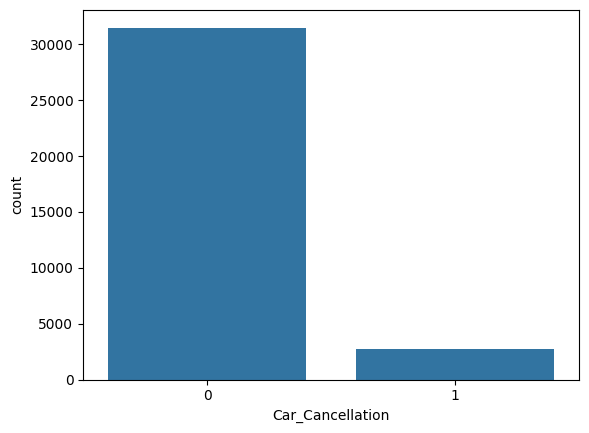

In [107]:
sns.countplot(x='Car_Cancellation', data=tt2)
plt.show()
#  ~10-15% of Long distance travel is cancelled

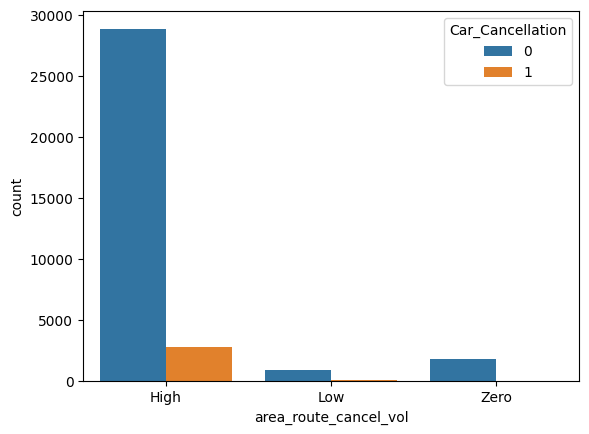

In [108]:
sns.countplot(x='area_route_cancel_vol',hue='Car_Cancellation', data=tt2)
plt.show()

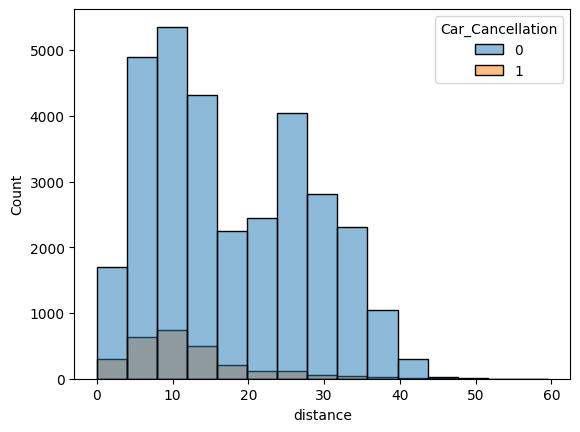

In [109]:
sns.histplot(data=tt2, x='distance', hue='Car_Cancellation', bins=15)
plt.show()

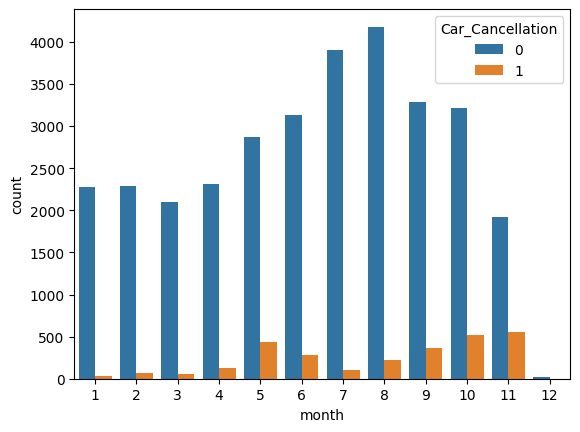

In [110]:
sns.countplot(x='month',hue='Car_Cancellation', data=tt2)
plt.show()

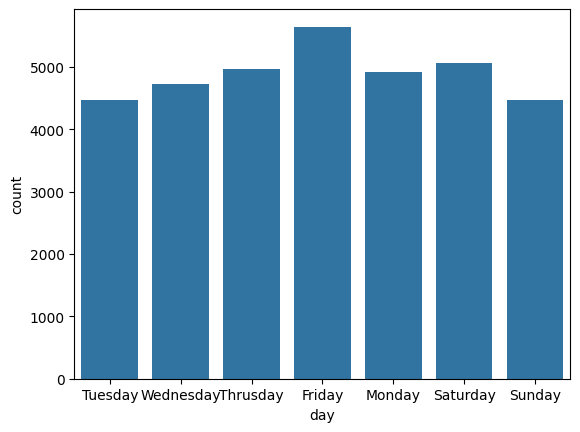

In [111]:
sns.countplot(x='day', data=tt2)
plt.show()

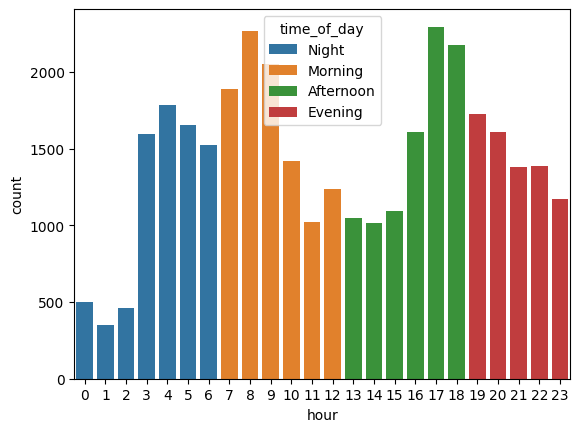

In [112]:
sns.countplot(x='hour',hue='time_of_day',data=tt2, legend=True)
plt.show()

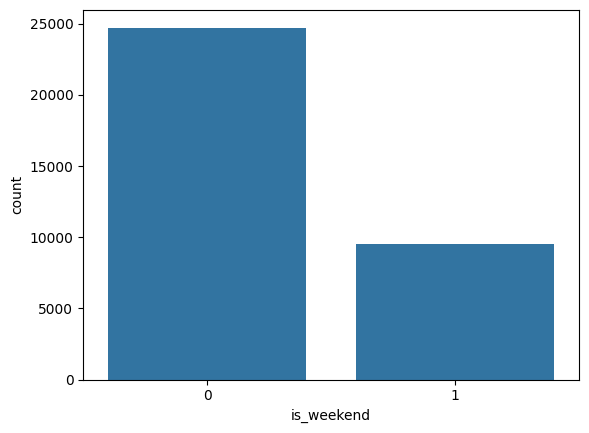

In [113]:
sns.countplot(x='is_weekend', data=tt2)
plt.show()

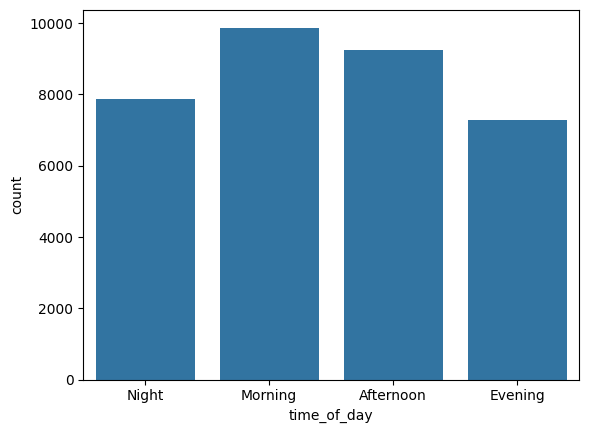

In [114]:
sns.countplot(x='time_of_day', data=tt2)
plt.show()

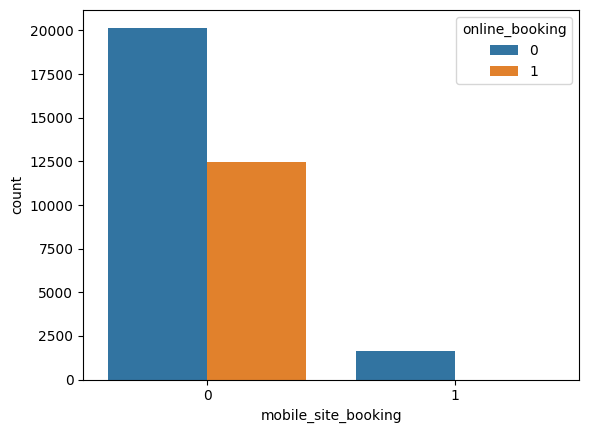

In [115]:
sns.countplot(x='mobile_site_booking',hue='online_booking', data=tt2)
plt.show()

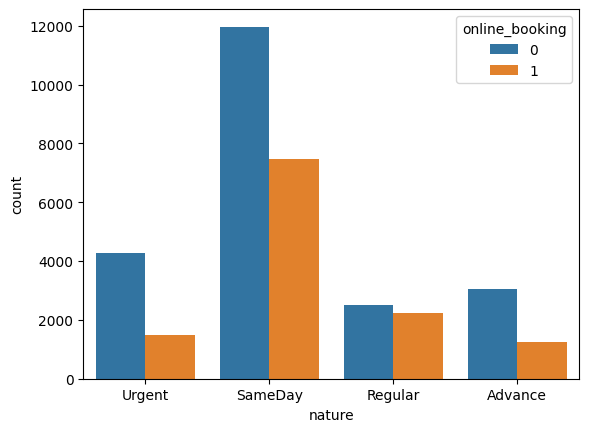

In [116]:
sns.countplot(x='nature',hue='online_booking', data=tt2)
plt.show()

# Label Encoding

In [117]:
tt2.sample(3)

,area_route_cancel_vol,distance,month,day,hour,is_weekend,time_of_day,nature,online_booking,mobile_site_booking,Car_Cancellation
id,,,,,,,,,,,
166601,High,26.147198,8,Tuesday,14,0,Afternoon,SameDay,1,0,0
134633,High,23.178473,1,Monday,3,0,Night,SameDay,0,0,0
164404,High,25.963706,8,Friday,19,0,Evening,SameDay,0,0,0


In [118]:
tt2.area_route_cancel_vol = tt2.area_route_cancel_vol.map({'Zero':0, 'Low':1, 'Medium':2, 'High':3})
tt2.time_of_day = tt2.time_of_day.map({'Morning':1, 'Afternoon':2, 'Evening':3, 'Night':4})
tt2.nature = tt2.nature.map({'Urgent':1, 'SameDay':2, 'Regular':3, 'Advance':4})
tt2.day = tt2.day.map({'Monday':0,'Tuesday':1,'Wednesday':2,'Thrusday':3,'Friday':4,'Saturday':5,'Sunday':6})
tt2.head()

,area_route_cancel_vol,distance,month,day,hour,is_weekend,time_of_day,nature,online_booking,mobile_site_booking,Car_Cancellation
id,,,,,,,,,,,
132512,3,3.980687,1,1,2,0,4,1,0,0,0
132513,3,14.004432,1,1,9,0,1,2,0,0,0
132514,3,12.648909,1,1,3,0,4,1,0,0,0
132515,1,9.534596,1,1,5,0,4,1,0,0,0
132517,3,14.655467,1,1,9,0,1,1,0,0,0


# Machine Learning

In [119]:
x = tt2.drop('Car_Cancellation', axis=1)
y=tt2['Car_Cancellation']

In [120]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=342)

## Descision Tree

In [121]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [122]:
ypred = dt.predict(xtest)

In [123]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9432
           1       0.32      0.32      0.32       846

    accuracy                           0.89     10278
   macro avg       0.63      0.63      0.63     10278
weighted avg       0.89      0.89      0.89     10278



## Naive Bayes

In [124]:
tt2['nature'].fillna(tt2['nature'].mode()[0], inplace=True)

In [125]:
tt2.isnull().sum()

,0
area_route_cancel_vol,0
distance,0
month,0
day,0
hour,0
is_weekend,0
time_of_day,0
nature,0
online_booking,0
mobile_site_booking,0


In [126]:
from sklearn.naive_bayes import GaussianNB
bnb = GaussianNB()

# Imputing missing values in 'nature' column with the mode
xtrain['nature'].fillna(xtrain['nature'].mode()[0], inplace=True)
xtest['nature'].fillna(xtest['nature'].mode()[0], inplace=True)

bnb.fit(xtrain, ytrain)
ypred = bnb.predict(xtest)

## Random Forest Classifier

In [127]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [128]:
ypred = rf.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      9432
           1       0.51      0.25      0.34       846

    accuracy                           0.92     10278
   macro avg       0.72      0.61      0.65     10278
weighted avg       0.90      0.92      0.91     10278

